In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
import os

# Set the path to your dataset directory
base_dir = '/Users/anuragtiwari/Downloads/gesture/leapGestRecog'


In [2]:
# Create ImageDataGenerators for training and validation data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of the training data for validation
)

# Use only rescaling for test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow data from directories
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(64, 64),  # Use a smaller target size for faster processing
    batch_size=16,         # Smaller batch size for faster iteration
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(64, 64),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

# Assuming you have a separate test directory
test_generator = test_datagen.flow_from_directory(
    base_dir,
    target_size=(64, 64),
    batch_size=16,
    class_mode='categorical',
    shuffle=True
)


Found 32000 images belonging to 11 classes.
Found 8000 images belonging to 11 classes.
Found 40000 images belonging to 11 classes.


In [3]:
# Define a simpler CNN model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with one epoch
history = model.fit(
    train_generator,
    epochs=1,  # Use only one epoch
    validation_data=val_generator
)


/Users/anuragtiwari/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/anuragtiwari/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 70s 35ms/step - accuracy: 0.5369 - loss: 1.3158 - val_accuracy: 0.1000 - val_loss: 5.1456


In [4]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 66s 26ms/step - accuracy: 0.4989 - loss: 1.5149
Test Accuracy: 50.00%


In [5]:
# Save the model
model.save('hand_gesture_model.h5')

# Load the model
model = tf.keras.models.load_model('hand_gesture_model.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted gesture: Unknown Gesture


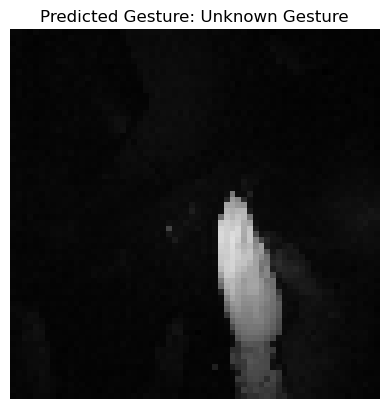

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import matplotlib.pyplot as plt

# Set the path to your dataset directory
base_dir = '/Users/anuragtiwari/Downloads/gesture/leapGestRecog'

# Define the mapping of class indices to gesture names
class_indices = {
    0: "01_palm",
    1: "02_L",
    2: "03_fist",
    3: "04_fist_moved",
    4: "05_thumb",
    5: "06_index",
    6: "07_ok",
    7: "08_palm_moved",
    8: "09_c",
    9: "10_down"
}

# Function to preprocess and predict a gesture from an image
def predict_gesture(model, img_path):
    img = image.load_img(img_path, target_size=(64, 64))  # Ensure the target size matches your model input
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.
    pred = model.predict(img_array)
    gesture_class = np.argmax(pred)
    gesture_name = class_indices.get(gesture_class, "Unknown Gesture")
    return gesture_name, img_array[0]  # Return the image array for plotting

# Load the model
model = tf.keras.models.load_model('hand_gesture_model.h5')

# Example prediction
img_path = '/Users/anuragtiwari/Downloads/gesture/leapGestRecog/00/01_palm/frame_00_01_0001.png'  # Replace with the correct path to your test image
gesture_name, img_array = predict_gesture(model, img_path)

# Print the predicted gesture
print(f"Predicted gesture: {gesture_name}")

# Display the image
plt.imshow(img_array)
plt.title(f"Predicted Gesture: {gesture_name}")
plt.axis('off')  # Hide axes
plt.show()
